In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir(r"C:\Users\vphar\Downloads\input"))

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns


['insurance.csv']


In [2]:
# reading the data

data1 = pd.read_csv(r"C:\Users\vphar\Downloads\input\insurance.csv")

# checking the shape
print(data1.shape)

(1339, 7)


In [3]:
# checking the head of the dataset

data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,male,27.900,0,yes,southwest,16884.92400
1,11,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# describing the data

data1.describe()

,age,bmi,children,charges
count,1339.000000,1339.000000,1339.000000,1339.000000
mean,39.195668,30.662909,1.094847,13282.275094
std,14.055696,6.095934,1.205045,12113.252330
min,11.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4742.306100
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.687500,2.000000,16717.010750
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# checking if the dataset contains any NULL values

data1.isnull().any()
if data1.isnull().any().any():
    raise ValueError("Error: The CSV file contains null values.")
else: 
    print("No null valued detected. Proceeding with further processing......")


No null valued detected. Proceeding with further processing......


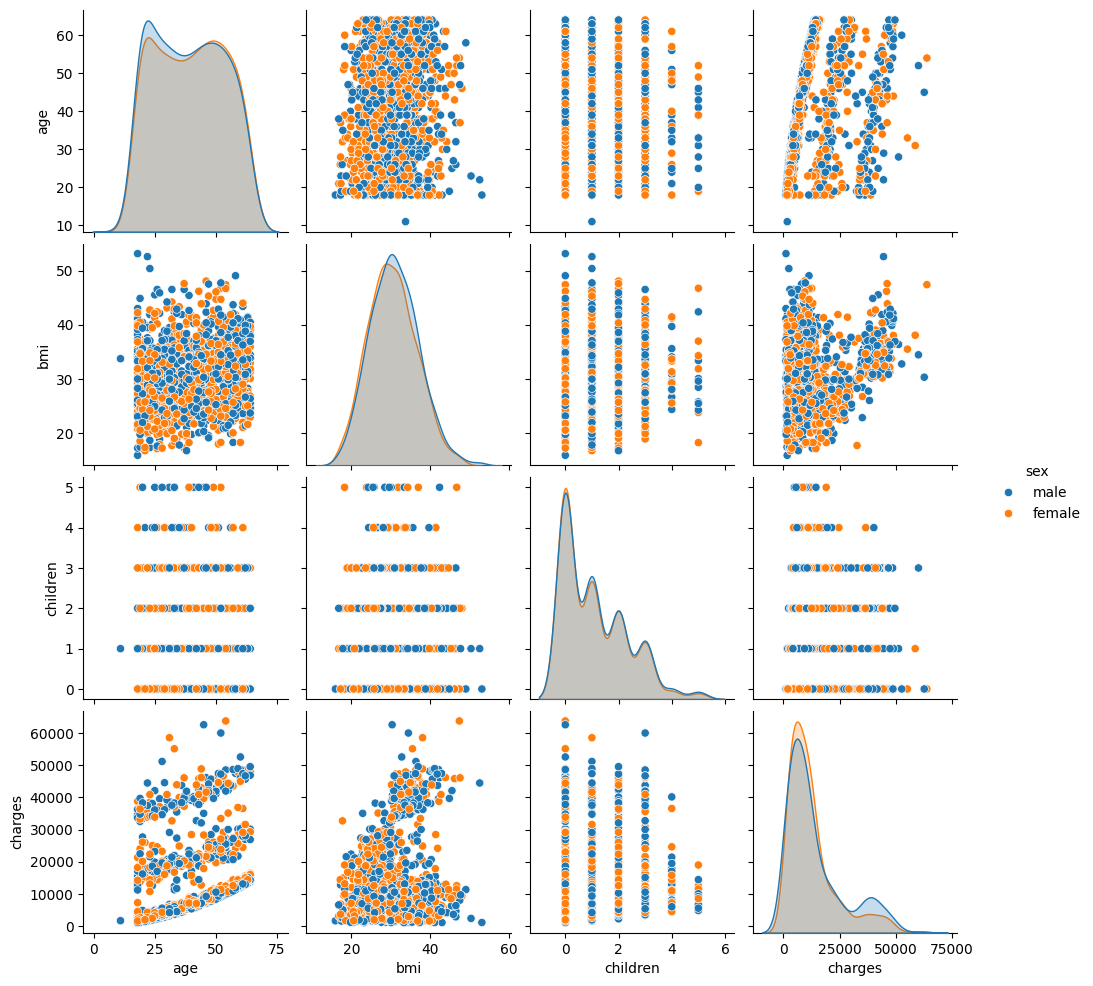

In [8]:
sns.pairplot(data1,hue="sex")

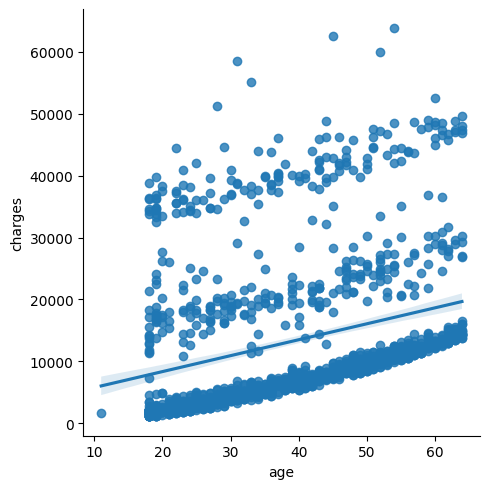

In [7]:
# lmplot between age and charges

sns.lmplot(x='age', y='charges', data=data1)

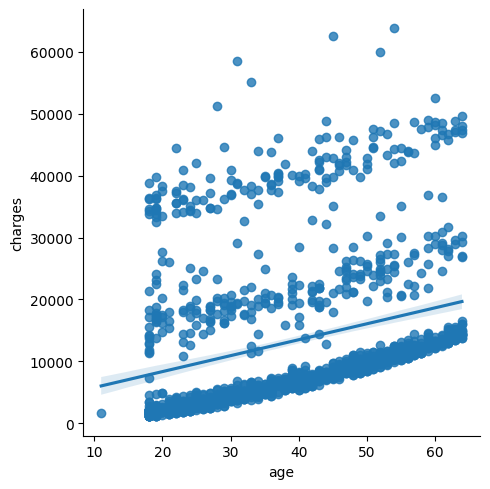

In [8]:
# lmplot between age and charges

sns.lmplot(x='age', y='charges', data=data1)

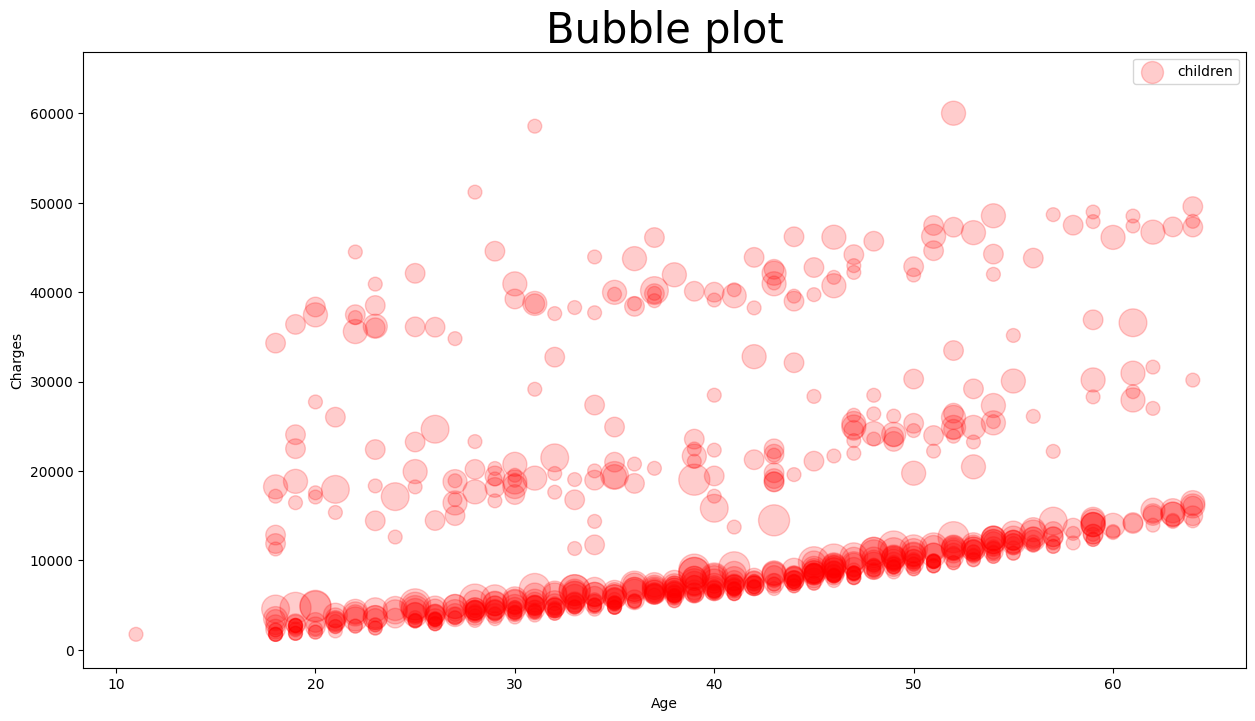

In [9]:
# bubble plot to show relation bet age, charges and children

plt.rcParams['figure.figsize'] = (15, 8)
plt.scatter(x = data1['age'], y = data1['charges'], s = data1['children']*100, alpha = 0.2, color = 'red',label='children')
plt.title('Bubble plot', fontsize = 30)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [10]:
# unique value counts in the sex category

data1['sex'].value_counts()

sex
male      678
female    661
Name: count, dtype: int64

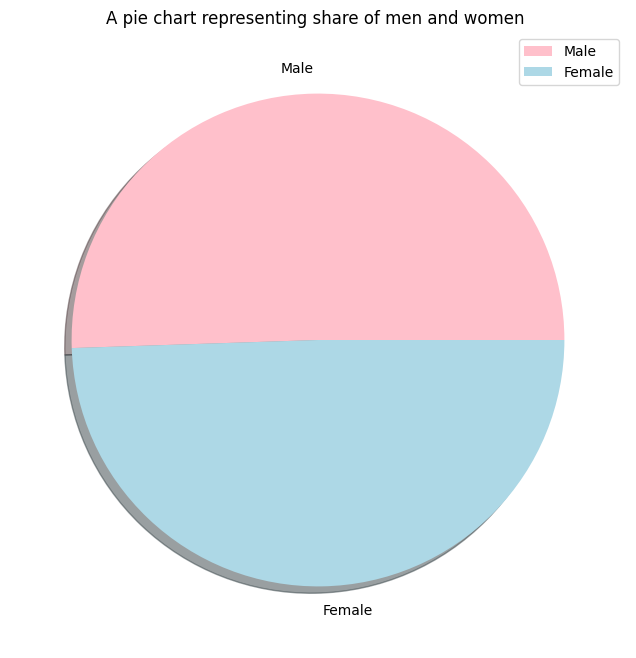

In [11]:
# pie chart

size = [676, 662]
colors = ['pink', 'lightblue']
labels = "Male", "Female"

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, shadow = True)
plt.title('A pie chart representing share of men and women ')
plt.legend()
plt.show()

C:\Users\vphar\AppData\Local\Temp\ipykernel_3804\2901815363.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['age'])


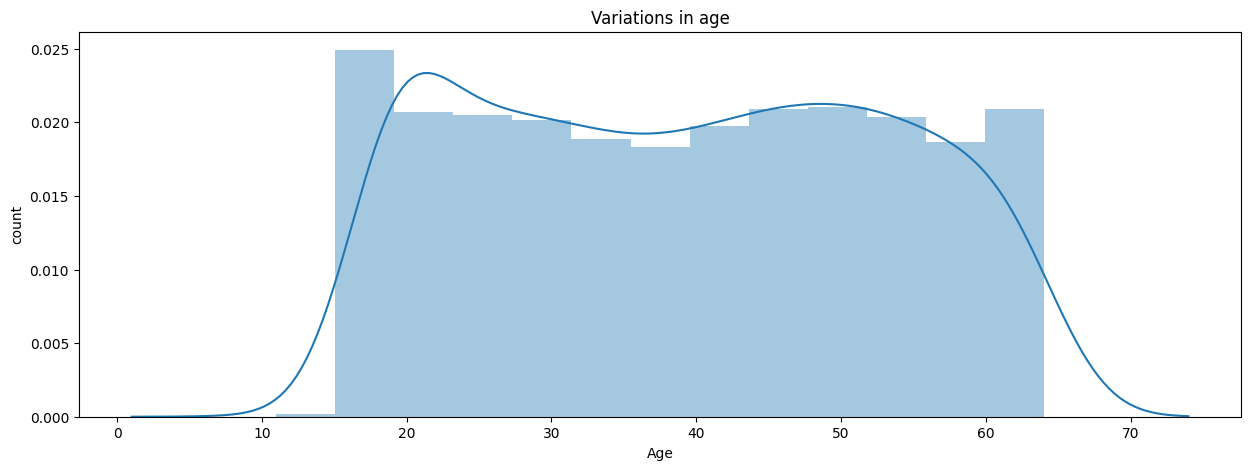

In [7]:
# visualizing the ages of the customers

plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data1['age'])
plt.title('Variations in age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

<Axes: xlabel='smoker'>

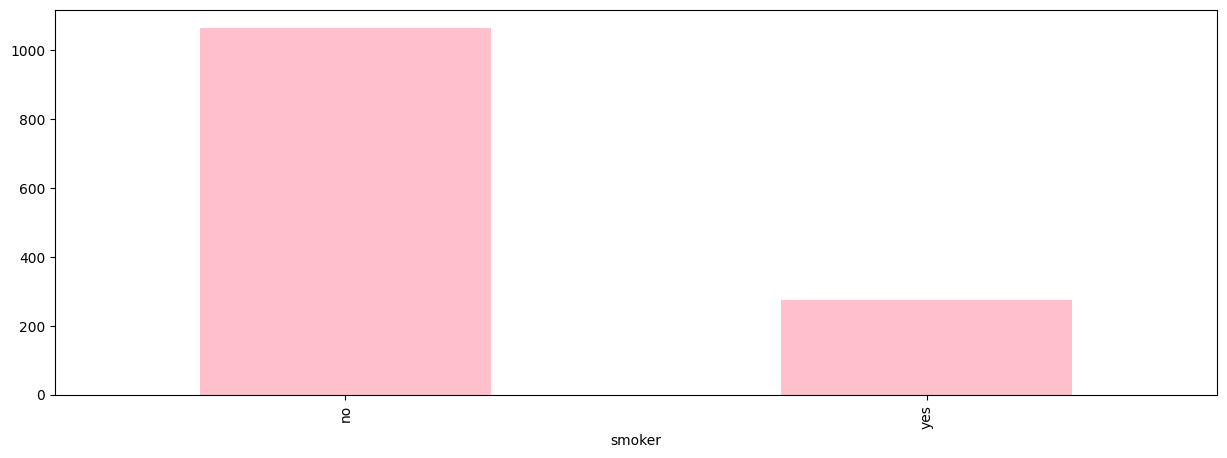

In [14]:
# checking how many people smoke

data1['smoker'].value_counts().plot.bar(color = 'pink')

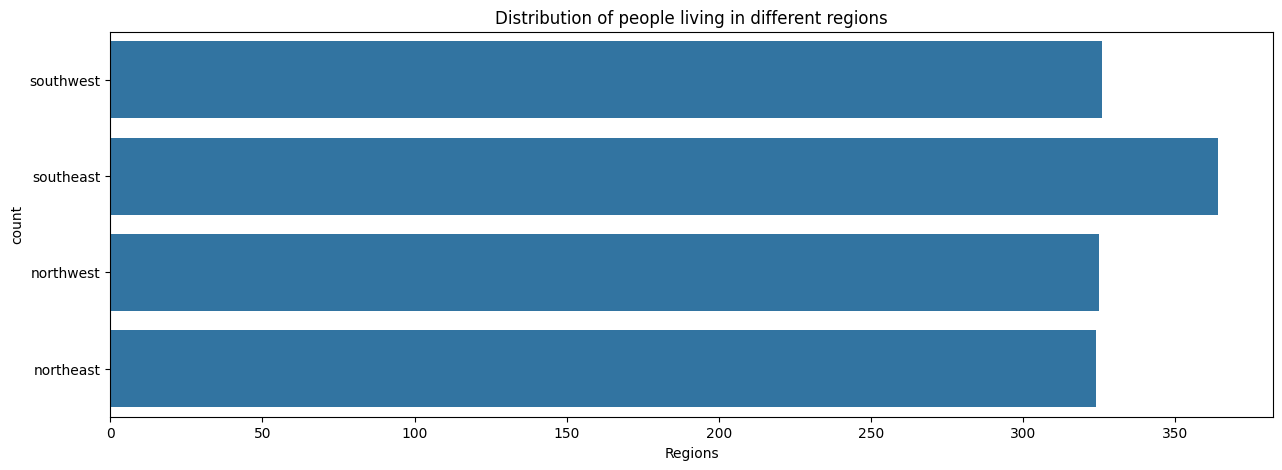

In [15]:

# visualizing the regions from where the people belong

sns.countplot( data1['region'])
plt.title('Distribution of people living in different regions')
plt.xlabel('Regions')
plt.ylabel('count')
plt.show()


Text(0.5, 1.0, 'Age vs Charges')

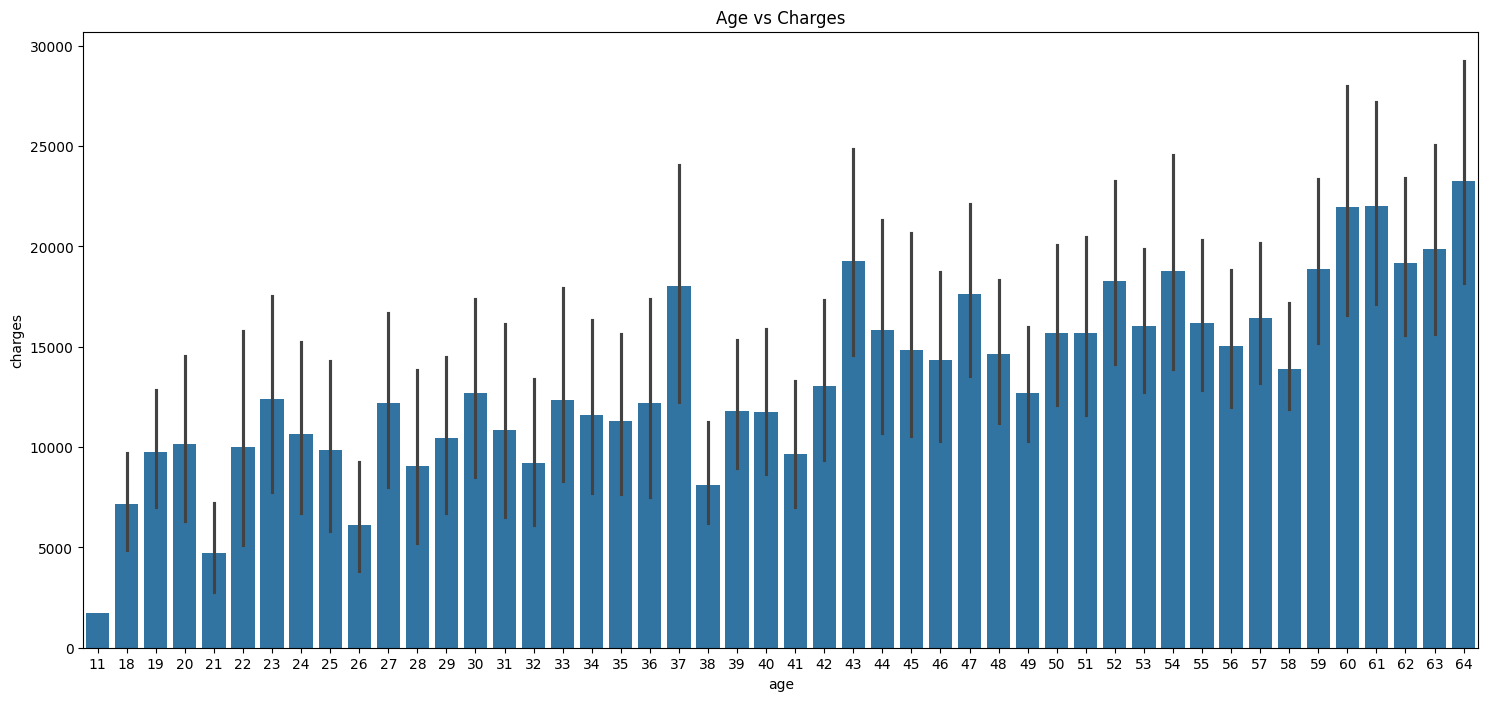

In [16]:
# Age vs Charges
# the more the age the more will be insurance charge (roughly estimated)

plt.figure(figsize = (18, 8))
sns.barplot(x = 'age', y = 'charges', data = data1)

plt.title("Age vs Charges")

Text(0.5, 1.0, 'sex vs charges')

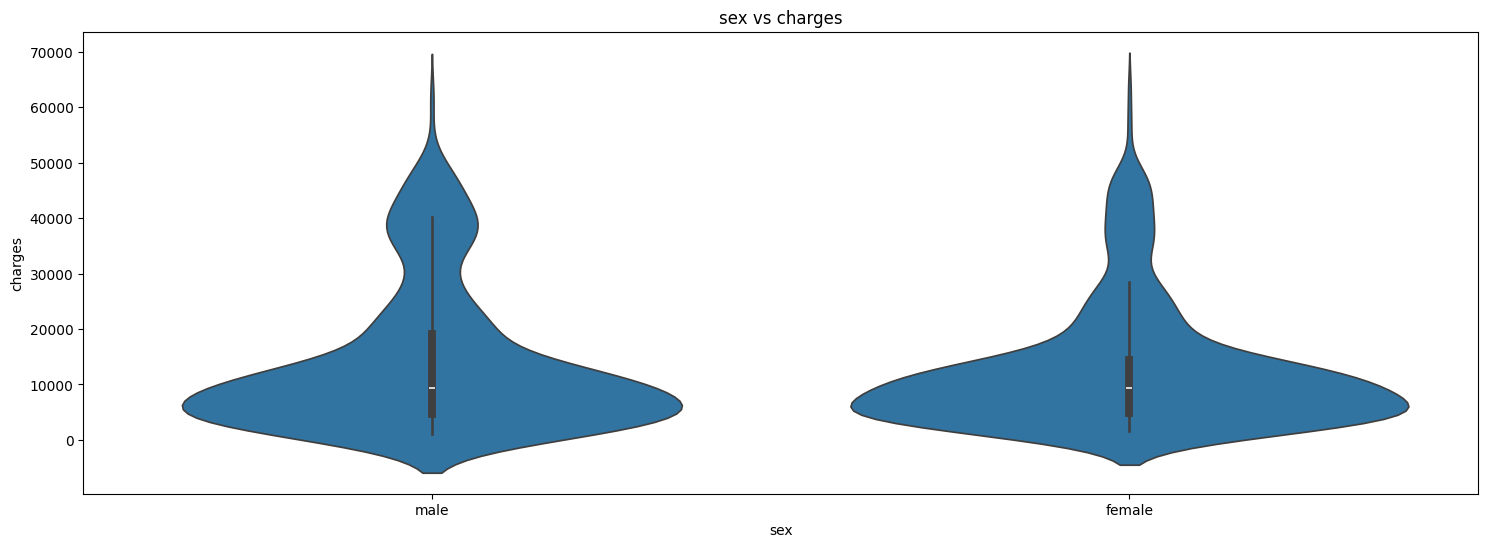

In [17]:
# sex vs charges
# males have slightly greater insurance charges than females in general

plt.figure(figsize = (18, 6))
sns.violinplot(x = 'sex', y = 'charges', data = data1)

plt.title('sex vs charges')

Text(0.5, 1.0, 'children vs charges')

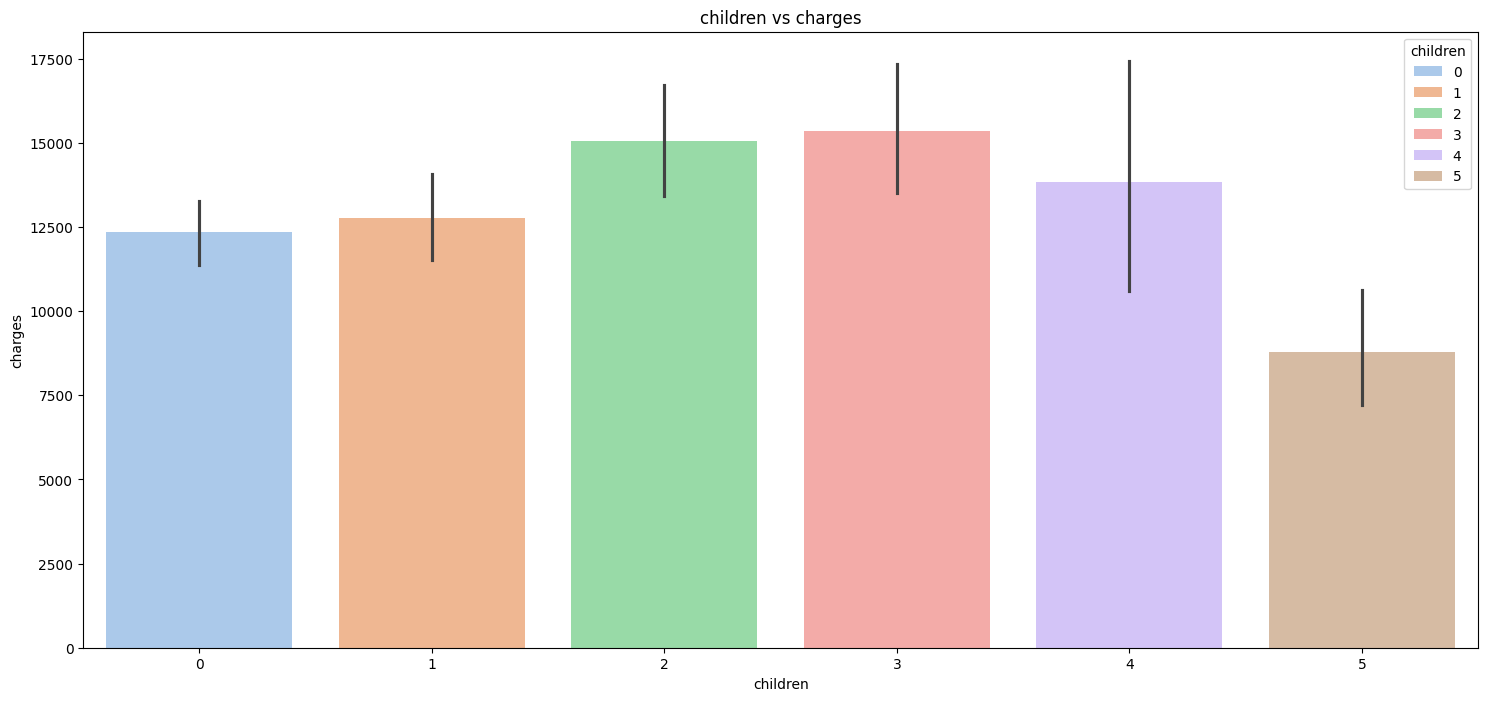

In [18]:
# children vs charges
# no. of childrens of a person has a very interesting dependency on insurance costs

plt.figure(figsize = (18, 8))
sns.barplot(x = 'children', y = 'charges', data = data1, palette ='pastel',hue='children')

plt.title('children vs charges')

Text(0.5, 1.0, 'region vs charges')

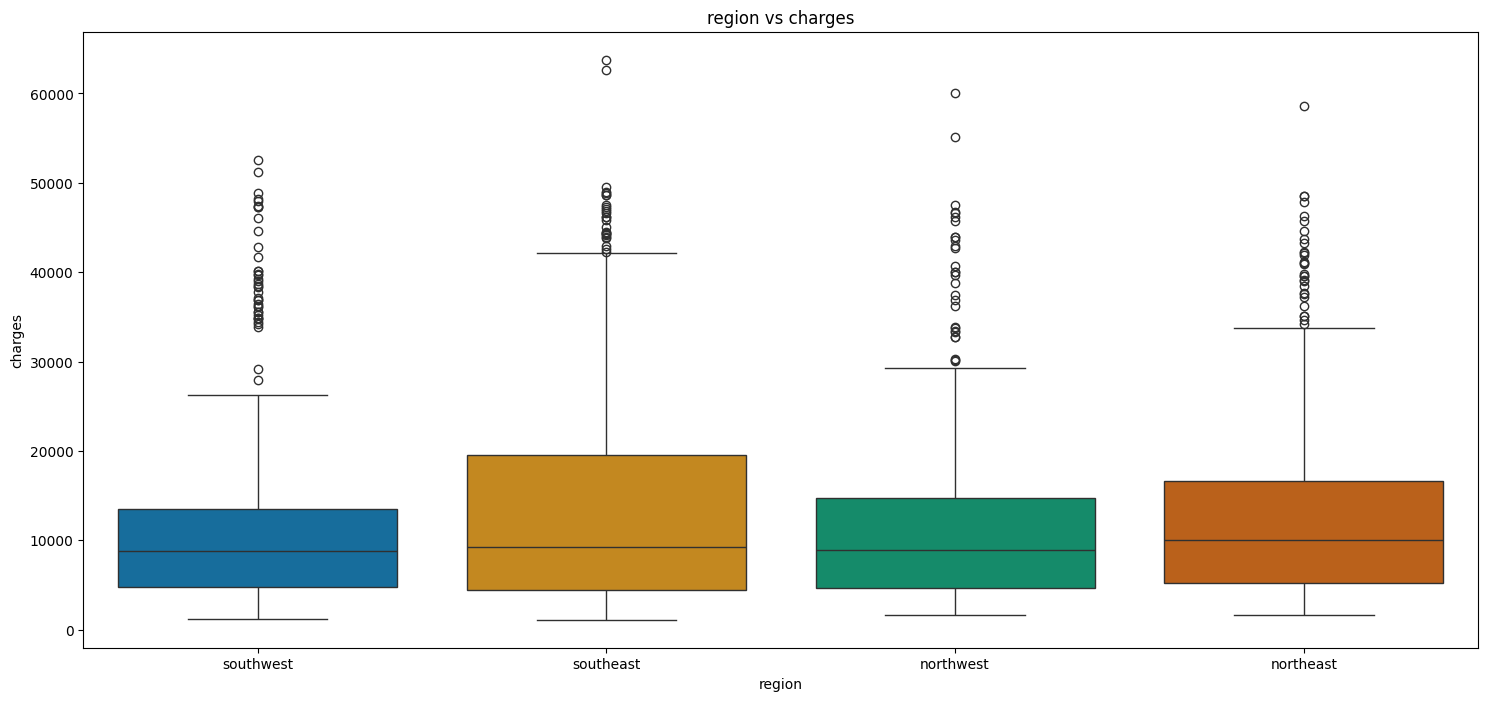

In [19]:
# region vs charges
# From the graph we can see that the region actually does not play any role in determining the insurance charges

plt.figure(figsize = (18, 8))
sns.boxplot(x = 'region', y = 'charges', data = data1, palette = 'colorblind',hue='region')

plt.title('region vs charges')

Text(0.5, 1.0, 'smoker vs charges')

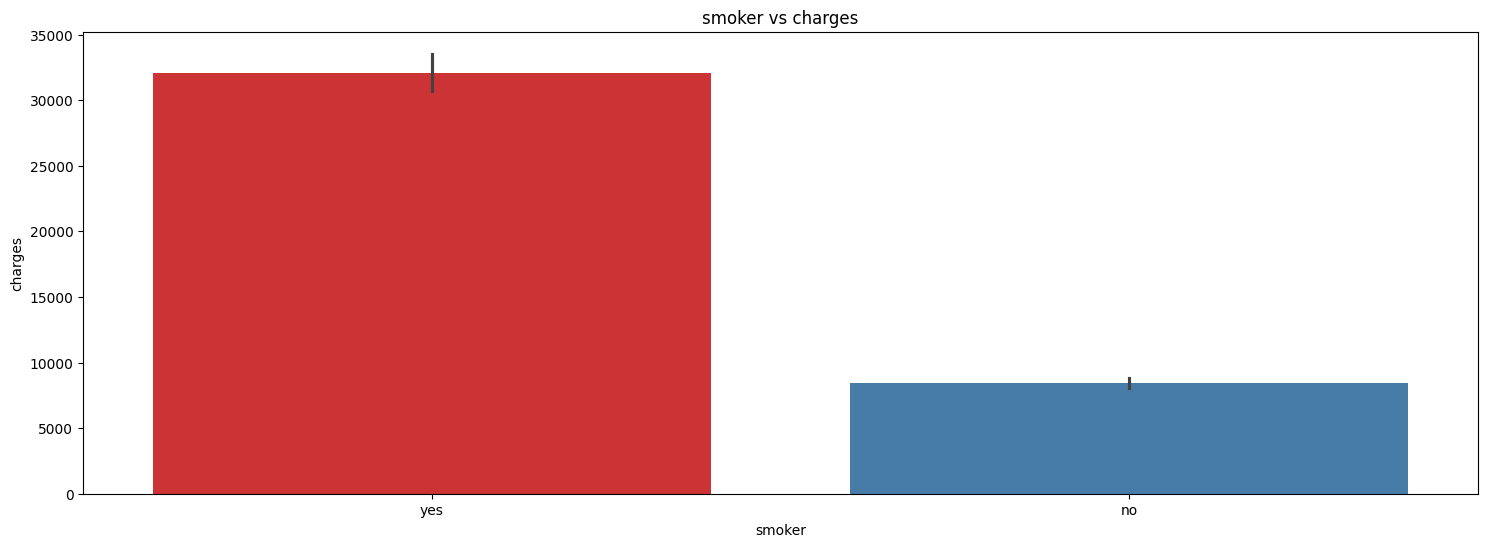

In [20]:
# smoker vs charges
# from the graph below, it is visible that smokers have more insurance charges than the non smokers
8
plt.figure(figsize = (18, 6))
sns.barplot(x = 'smoker', y = 'charges', data = data1, palette = 'Set1',hue='smoker')

plt.title('smoker vs charges')

<Axes: >

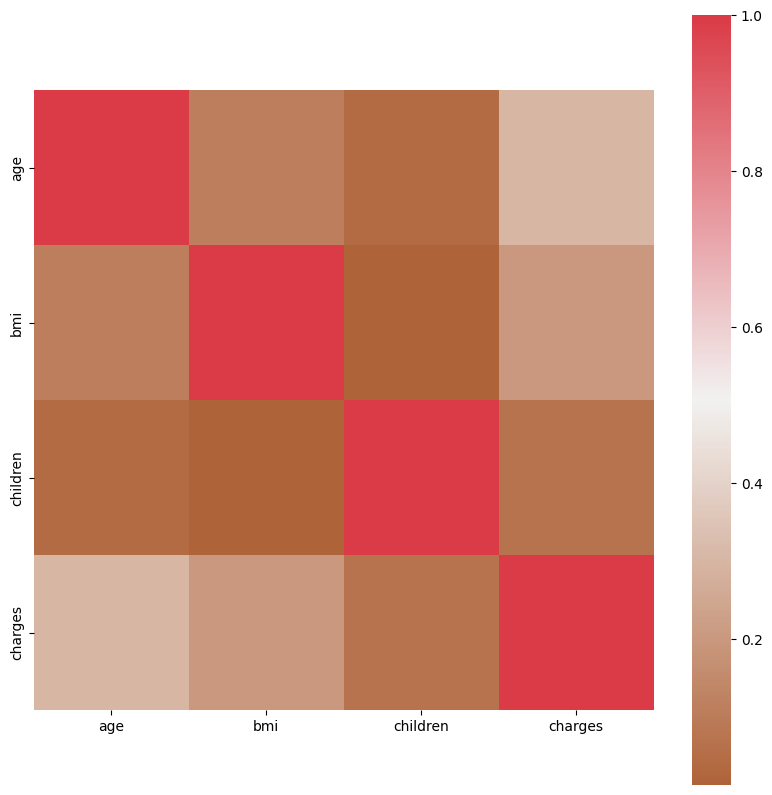

In [21]:
# Selecting only numeric columns
numeric_data1 = data1.select_dtypes(include=np.number)

# Plotting the correlation plot for the dataset
f, ax = plt.subplots(figsize=(10, 10))
corr = numeric_data1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(30, 10, as_cmap=True), square=True, ax=ax)




In [22]:
# removing unnecassary columns from the dataset

data = data1.drop('region', axis = 1)
print(data.shape)
data.columns

(1339, 6)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [23]:
# label encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
data['sex'] = le.fit_transform(data['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
data['smoker'] = le.fit_transform(data['smoker'])

In [24]:
# splitting the dependent and independent variable

x = data.iloc[:,:5]
y = data.iloc[:,5]

print(x.shape)
print(y.shape)

(1339, 5)
(1339,)


In [25]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1071, 5)
(268, 5)
(1071,)
(268,)


In [26]:
# standard scaling

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)



In [27]:
# feature extraction

from sklearn.decomposition import PCA

pca = PCA(n_components = None)

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)


In [28]:

# REGRESSION ANALYSIS
# RANDOM FOREST


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# creating the model
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

# feeding the training data to the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)


MSE : 25539096.391080983
RMSE : 5053.622106082031
r2 score : 0.8311508656305453


In [1]:


# Prepare input data for prediction
customer_data = pd.DataFrame({
    'age': [18],
    'sex': [1],  # Assuming male is encoded as 1
    'bmi': [22.7],  # You need to provide BMI for the customer
    'children': [0],  # You need to provide the number of children for the customer
    'smoker': [0],  # Assuming the customer is a smoker 
})

# Standardize input data
customer_data_scaled = sc.transform(customer_data)

# Predict insurance amount
predicted_insurance_amount = model.predict(customer_data_scaled)


print('The predicted insurance amount is: ',predicted_insurance_amount,' per annum')
print('On including offsets, your total cost estimates around: ',predicted_insurance_amount+5000, 'to',predicted_insurance_amount-5000,' per annum')


NameError: name 'pd' is not defined